In [3]:
import numpy as np
from qiskit import QuantumCircuit as QC
from qiskit import execute
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()
from qiskit.visualization import plot_histogram

ibmqfactory.load_account:WARNING:2020-10-23 19:43:24,898: Credentials are already in use. The existing account in the session will be replaced.


In [21]:
def oracle(case, n):
    ##creating an oracle
    oracle_qc = QC(n+1)
    if case=="balanced":
        for i in range(n):
            oracle_qc.cx(i,n)
    if case=="constant":
        pass
    
    ##converting circuit to a indivsual gate
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    
    return oracle_gate
        

In [22]:
def dj_algo(n, case="random"):
    dj_crc = QC(n+1,n)
    
    for i in range(n):
        dj_crc.h(i)
        
    dj_crc.x(n)
    dj_crc.h(n)
    
    if case=="random":
        rnd = np.random.randint(2)
        if rnd == 0:
            case = "constant"
        else:
            case = "balanced"
    
    dj_oracle = oracle(case, n)
    dj_crc.append(dj_oracle, range(n+1))
    
    for i in range(n):
        dj_crc.h(i)
        dj_crc.measure(i,i)
    
    return dj_crc 

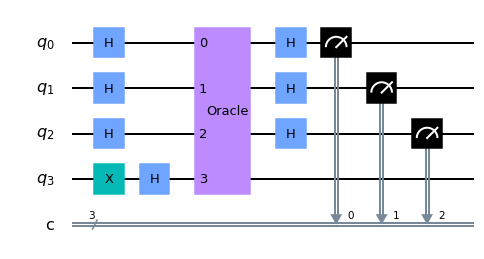

In [39]:
n = 3
dj_crc = dj_algo(n)
dj_crc.draw('mpl')

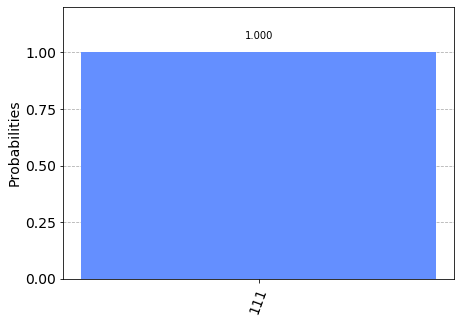

In [40]:
#simulating
backend=BasicAer.get_backend('qasm_simulator')
shots = 1024
dj_circuit = dj_algo(n, "balanced")
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [49]:
#running on real quantum computer
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                      not x.configuration().simulator and x.status().operational == True))
print("Using least busy backend: ", backend)
%qiskit_job_watcher
dj_circuit = dj_algo(n, "balanced")
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)


Using least busy backend:  ibmq_valencia


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

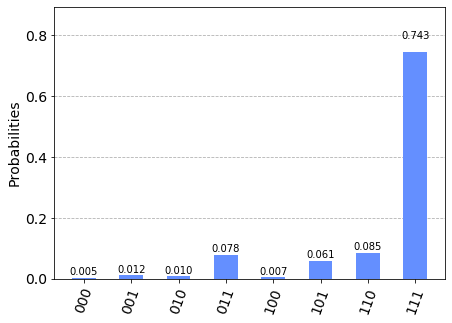

In [50]:
result = job.result()
answer = result.get_counts()
plot_histogram(answer)

## Viola! With high confindencev (95.5%) we can say that our orcale was a balanced one that is indeed the case!